In [1]:
%matplotlib inline

In [2]:
import glob
from IPython.display import display, Markdown, HTML
import os
import matplotlib.pyplot as plt
import pandas as pd
from typing import Callable, Dict, List

In [3]:
# Copy table from ITRA race result, paste to textedit, copy/paste to OO Calc
def read_itra(filename: str) -> pd.DataFrame:
    df = pd.read_excel(filename)
    df = df[['name', 'time', 'score']]
    df['name'] = df['name'].apply(lambda s: s.strip().title())
    df['time'] = df['time'].astype(str)
    df['time'] = df['time'].apply(lambda s: s.replace(' AM', '') if s else '')
    df['time'] = df['time'].apply(lambda s: pd.Timedelta(s) if s else pd.NaT )
    df = df[ df['time'].notnull() ]
    df = df.reset_index(drop=True)
    return df


In [4]:
files = sorted(glob.glob('data/sample-itra-results/*.xlsx'))
dfs = [read_itra(f) for f in files]

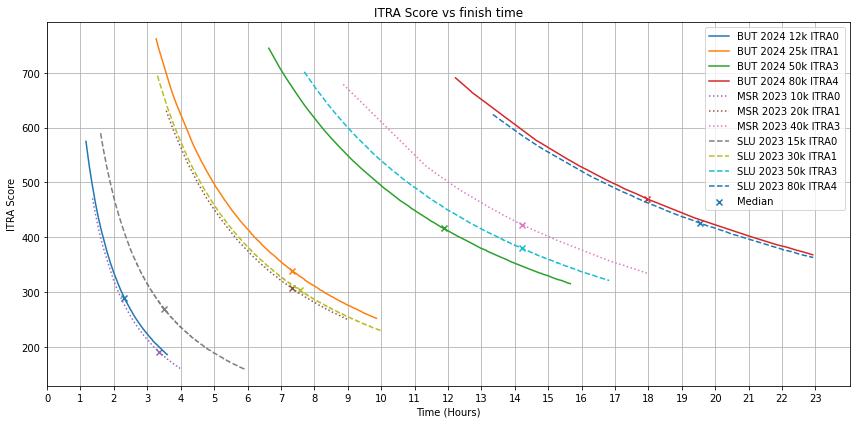

In [8]:
def plot(dataset):
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    for i, (file, df) in enumerate(dataset):
        label = os.path.basename(file).split('.')[0].replace('-', ' ')
        times = df['time'].dt.seconds / 3600
        scores = df['score']
        med = len(times) // 2
        ax.plot(times, scores, color=f'C{i}', label=label, 
                linestyle='--' if 'SLU' in label else ':' if 'MSR' in label else '-')
        ax.scatter(times.iloc[med], scores.iloc[med], color=f'C{i}',
                   marker='x', label='Median' if i==0 else None)
    ax.grid()
    ax.legend()
    ax.set_xlabel('Time (Hours)')
    ax.set_ylabel('ITRA Score')
    ax.set_title('ITRA Score vs finish time')
    ax.set_xticks(range(int(ax.set_xlim()[1])))
    fig.tight_layout()
    plt.show()
    
plot(zip(files, dfs))